# Clasificador MNIST

Se siguen los siguientes pasos:

* [Paso_n](#step_n): Clasificador final, resultado del entrenamiento y preprocesamiento .... blabla 
* [Paso_n2](#step_n2): Validación del clasificador sobre base de test original.

### Paquetes

In [16]:
import gzip
import shutil
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import test
import PIL
import seaborn as sns  #Density plot
from PIL import Image, ImageFilter
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import random
from random import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from mpl_toolkits.mplot3d import Axes3D
import scipy.spatial.distance
from scipy.spatial import distance
from scipy.spatial.distance import cdist, pdist
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import cv2

In [17]:
#os.getcwd() #Directorio actual
#os.chdir('./Clasificador_MNIST/BASES') #Set directory

In [18]:
df = pd.read_csv('./BASES/mnist_train.csv', header = None, sep = ',')

In [19]:
print(df.shape)
df.head()

(60000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df = df.sort_values(by = [0])
df[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

### Train - Test

In [21]:
def arroz(df, perct):
    i = 0
    train_ii = []
    test_ii = []
    while i < 10:
        base_i = df.loc[df[0]==i, :]
        split_i = int(perct * len(base_i))
        train_i = base_i[:split_i]
        test_i = base_i[split_i:]
        train_ii.append(train_i)
        test_ii.append(test_i)
        i = i + 1
    return train_ii, test_ii

In [22]:
train,test = arroz(df, 0.8)

### Train

In [23]:
train =  pd.concat(train)
print(train.shape)
Y_train = train.loc[: , 0]
X_train = train.loc[: , 1:]

(47995, 785)


### Test

In [24]:
test =  pd.concat(test)
print(test.shape)
Y_test = test.loc[: , 0]
X_test = test.loc[: , 1:]

(12005, 785)


### Imagen

In [25]:
def imprime_num(img):
    return plt.imshow(np.array(img).reshape(28,28), cmap='gray')

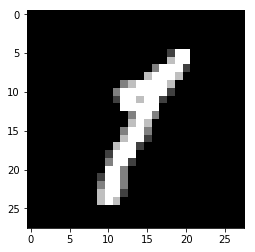

In [26]:
imprime_num(X_train.iloc[5500])

### Gráfica

(array([4738., 5393., 4766., 4904., 4673., 4336., 4734., 5012., 4680.,
        4759.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

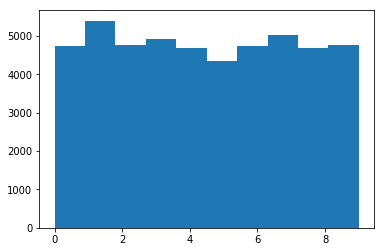

In [27]:
plt.hist(Y_train)

(array([1185., 1349., 1192., 1227., 1169., 1085., 1184., 1253., 1171.,
        1190.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

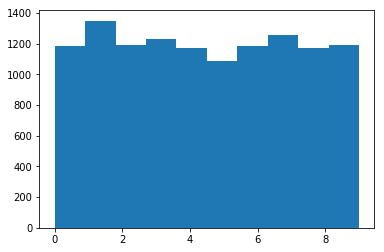

In [28]:
plt.hist(Y_test)

c:\users\c804324\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


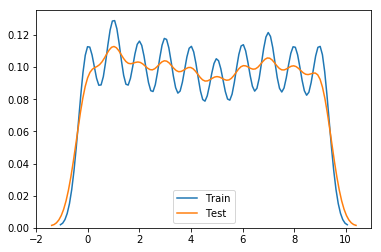

In [29]:
sns.kdeplot(Y_train, label = "Train")
sns.kdeplot(Y_test, label = "Test")

# KNN dígitos: 3 - 8

### Train

In [30]:
train_3 = train.loc[df[0]==1, :]
train_8 = train.loc[df[0]==7, :]
knn = train_3.append(train_8)

In [31]:
Y_knn = knn.loc[: , 0]
X_knn = knn.loc[: , 1:]
type(X_knn)

pandas.core.frame.DataFrame

### Test

In [32]:
test_2 = test.loc[df[0]==1, :]
test_8 = test.loc[df[0]==7, :]
knn_test = test_2.append(test_8)

In [33]:
Y_knn_test = knn_test.loc[: , 0]
X_knn_test = knn_test.loc[: , 1:]
type(X_knn_test)

pandas.core.frame.DataFrame

### Análisis de componentes principales

In [34]:
def entren(images,images_t):
    inf = list(range(70, 100, 5))
    proporcion = []
    pca_train = []
    pca_test = []
    for i in range(0,len(inf)):
        Sc = StandardScaler()
        ScX = Sc.fit(images)
        ScX_train = ScX.transform(images)
        ScY_train = ScX.transform(images_t)
        pca = PCA(inf[i]/100)
        principal_fit = pca.fit(ScX_train)
        principal_trans = principal_fit.transform(ScX_train)
        principal_test = principal_fit.transform(ScY_train)
        dfprin = pd.DataFrame(principal_trans)
        dfimag = pd.DataFrame(ScX_train)
        df_test = pd.DataFrame(principal_test)
        cant = (len(dfprin.columns)/len(dfimag.columns))*100
        proporcion.append(cant)
        pca_train.append(dfprin)
        pca_test.append(df_test)
        colors = ['b','red','pink', 'black', 'yellow', 'orangered']
        plt.semilogy(pca.explained_variance_ratio_, '--', c = colors[i], label = "Individual");
        plt.semilogy(pca.explained_variance_ratio_.cumsum(), '--', c = 'darkcyan', label = "Acumulado");
        plt.title('Variabilidad', fontsize = 25);
        plt.xlabel('Componentes evaluados', fontsize = 13);
        plt.ylabel('Variabilidad aportada', fontsize = 13);
        plt.legend()
        plt.show()
    return(proporcion, pca_train, pca_test,inf)

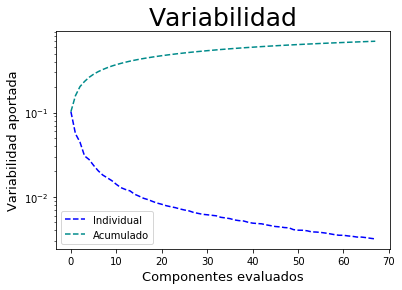

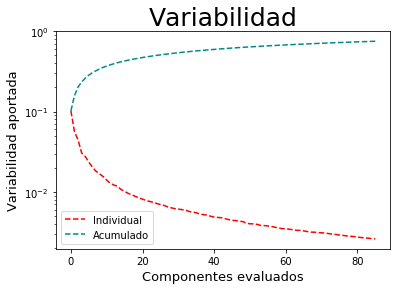

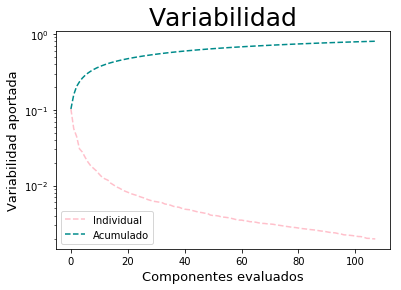

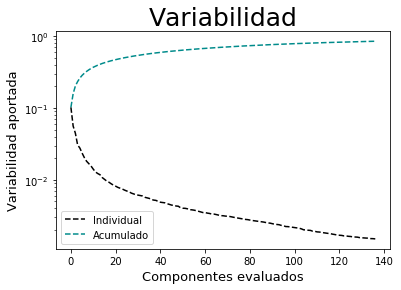

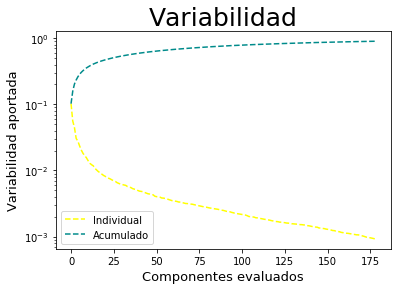

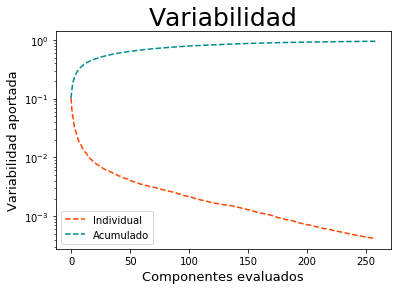

In [35]:
proporcion, pca_train, pca_test, inf = entren(X_knn,X_knn_test)

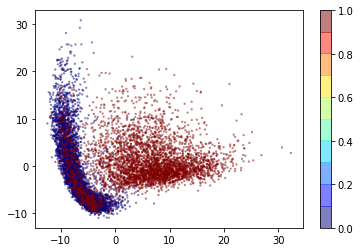

In [36]:
plt.scatter(pca_train[0].iloc[:9000,0], pca_train[0].iloc[:9000,1], c = Y_train[:9000], edgecolor ='none',alpha = 0.5, cmap = plt.get_cmap('jet', 10), s = 5)
plt.colorbar()

### Knn

In [39]:
def miknn(pca_train,pca_test,Y_train, Y_test):
    score_knn = []
    mat_conf = []
    k = list(range(3,15,2))
    for i in range(0,len(k)):
        for j in range(0,len(pca_train)):
            modelknn = KNeighborsClassifier(n_neighbors = k[i])
            modelknn.fit(pca_train[j],Y_train) 
            pred = modelknn.predict(pca_test[j])
            cm = confusion_matrix(Y_test, pred)
            scor = modelknn.score(pca_test[j], Y_test)
            mat_conf.append(cm)
            score_knn.append(scor)
    return(score_knn,mat_conf,k)

In [40]:
score_knn, mat_conf, k = miknn(pca_train,pca_test,Y_knn,Y_knn_test)

In [37]:
k_3_score = score_knn[0:6]
index3 = k_3_score.index(max(k_3_score))
k_5_score = score_knn[6:12]
index5 = k_5_score.index(max(k_5_score))
k_7_score = score_knn[12:18]
index7 = k_7_score.index(max(k_7_score))
k_9_score = score_knn[18:24]
index9 = k_9_score.index(max(k_9_score))
k_11_score = score_knn[24:30]
index11 = k_11_score.index(max(k_11_score))
k_13_score = score_knn[30:36]
index13 = k_13_score.index(max(k_13_score))

NameError: name 'score_knn' is not defined

In [25]:
indscore = [index3,index5,index7,index9,index11,index13]
maxim = [k_3_score, k_5_score, k_7_score, k_9_score, k_11_score, k_13_score]
indscore

[2, 5, 0, 2, 0, 1]

In [26]:
def prec(index,bases):
    valores = []
    for i in range(0,len(index)):
        valor = bases[i][indscore[i]]
        valores.append(valor)

    return(valores)

In [27]:
valores = prec(indscore, maxim)

In [28]:
mejor_score_knn = valores.index(max(valores))
mejor_score_knn

1

In [29]:
def knnesito(mejor,k):
    i = 3
    if mejor == i:
        print ("El mejor modelo necesita", k[mejor], "vecinos")
    elif mejor == (i+2):
        print ("El mejor modelo necesita", k[mejor], "vecinos")
    elif mejor == (i+4):
        print ("El mejor modelo necesita", k[mejor], "vecinos")
    elif mejor == (i+6):
        print ("El mejor modelo necesita", k[mejor], "vecinos")
    elif mejor == (i+8):
        print ("El mejor modelo necesita", k[mejor], "vecinos")
    else:
        print ("El mejor modelo necesita", k[mejor], "vecinos")
    

In [30]:
knnesito(mejor_score_knn, k)

El mejor modelo necesita 5 vecinos


### Logit

In [31]:
def milogit(X_train,X_test,Y_train, Y_test):
    score_logit = []
    cm_logit = []
    predlog = []
    logreg = LogisticRegression()
    for j in range(0,len(X_train)):
        logit = logreg.fit(X_train[j], Y_train)
        pred_logit = logreg.predict(X_test[j])
        cmlogit = metrics.confusion_matrix(Y_test, pred_logit)
        cm_logit.append(cmlogit)
        score_j = logreg.score(X_test[j], Y_test)
        score_logit.append(score_j)
        predlog.append(pred_logit)
    return(score_logit,cm_logit, predlog)

In [32]:
score_logit, cm_logit, predlog = milogit(pca_train,pca_test,Y_knn, Y_knn_test)

In [33]:
def rates(cm_logit):
    TP = []
    SP = []
    PC = []
    for i in range(0,len(cm_logit)):
        yes = (cm_logit[i][1,1])/(cm_logit[i][1,1]+cm_logit[i][1,0])
        No = (cm_logit[i][0,0])/(cm_logit[i][0,0]+cm_logit[i][0,1])
        Prc = (cm_logit[i][1,1])/(cm_logit[i][1,1]+cm_logit[i][0,1])
        TP.append(yes)
        SP.append(No)
        PC.append(Prc)
    return(TP,SP,PC)

In [34]:
TP, SP, PC = rates(cm_logit)

In [35]:
model_to = [TP.index(max(TP)),SP.index(max(SP)), PC.index(max(PC)), score_logit.index(max(score_logit))]

def comun(lst):
    return max(set(lst), key = lst.count)

In [36]:
comun = comun(model_to)

def logita(comun,inf):
    i = 0
    if comun == i:
        print ("El mejor modelo necesita", inf[comun], "% de variablidad contenida")
    elif comun == (i+1):
        print ("El mejor modelo necesita", inf[comun], "% de variablidad contenida")
    elif comun == (i+2):
        print ("El mejor modelo necesita", inf[comun], "% de variablidad contenida")
    elif comun == (i+3):
        print ("El mejor modelo necesita", inf[comun], "% de variablidad contenida")
    elif comun == (i+4):
        print ("El mejor modelo necesita", inf[comun], "% de variablidad contenida")
    else:
        print ("El mejor modelo necesita", inf[comun], "% de variablidad contenida")
    

In [37]:
logita(comun,inf)

El mejor modelo necesita 70 % de variablidad contenida


# Prueba

### Knn 2 dígitos

In [38]:
modelknn =  KNeighborsClassifier(n_neighbors = 3)
modelknn.fit(pca_train[0], Y_knn)
prediccion_knn = modelknn.predict(pca_test[0])

In [39]:
onfknn = metrics.confusion_matrix(Y_knn_test, prediccion_knn)
score_knn = modelknn.score(pca_test[0], Y_knn_test)
score_knn
matriz = metrics.confusion_matrix(Y_knn_test, prediccion_knn)
matriz_a = confusion_matrix(Y_knn_test, prediccion_knn)
matriz_normi = matriz.astype('float')/matriz.sum(axis = 1)[:, np.newaxis]
matriz_a

array([[1343,    6],
       [   3, 1250]], dtype=int64)

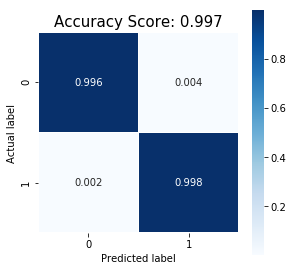

In [40]:
plt.figure(figsize=(4.5,4.5))
sns.heatmap(matriz_normi, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(score_knn) 
plt.title(all_sample_title, size = 15);

### Logit 2 dígitos

In [41]:
logreg = LogisticRegression()
logreg.fit(pca_train[0], Y_knn)
predicciones_logit = logreg.predict(pca_test[0])

In [42]:
score_logit = logreg.score(pca_test[0], Y_knn_test)
score_logit

0.995772482705611

In [43]:
matriz = metrics.confusion_matrix(Y_knn_test, predicciones_logit)
matriz_b = confusion_matrix(Y_knn_test, predicciones_logit)
matriz_norma = matriz.astype('float')/matriz.sum(axis = 1)[:, np.newaxis]
matriz_b

array([[1343,    6],
       [   5, 1248]], dtype=int64)

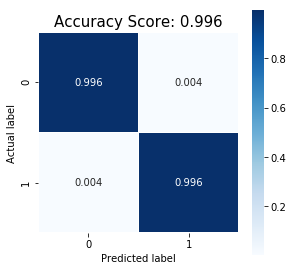

In [44]:
plt.figure(figsize=(4.5,4.5))
sns.heatmap(matriz_norma, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(score_logit) 
plt.title(all_sample_title, size = 15);

# Total valores

In [47]:
Sc = StandardScaler()
ScX = Sc.fit(X_train)
ScX_train = ScX.transform(X_train)
ScY_train = ScX.transform(X_test)
pca = PCA(0.7)
principal_fit = pca.fit(ScX_train)
principal_trans = principal_fit.transform(ScX_train)
principal_test = principal_fit.transform(ScY_train)
dfprin = pd.DataFrame(principal_trans)
dfimag = pd.DataFrame(ScX_train)
df_test = pd.DataFrame(principal_test)
cant = (len(dfprin.columns)/len(dfimag.columns))*100

### Knn

In [48]:
knn = KNeighborsClassifier(n_neighbors = 9)

In [49]:
knn_entrenado = knn.fit(principal_trans, Y_train)

In [50]:
knn_predict = knn_entrenado.predict(df_test)
knnscore = knn.score(df_test, Y_test)
knnscore

0.9536026655560184

In [51]:
def predict_knn(img, knn_entrenado):
    return knn_entrenado.predict(img)

In [52]:
cm_knn = metrics.confusion_matrix(Y_test, knn_predict)
cm_knn_nor = cm_knn.astype('float') / cm_knn.sum(axis=1)[:, np.newaxis]

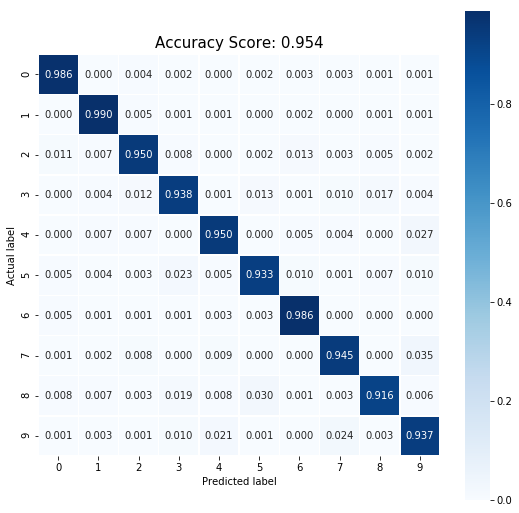

In [53]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_knn_nor, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(knnscore) 
plt.title(all_sample_title, size = 15);

In [54]:
index = 0
incorrectas_knn = []
for label,predictl in zip(Y_test, knn_predict):
    if label != predictl:
        incorrectas_knn.append(index)
    index += 1

In [55]:
len(incorrectas_knn)

557

### Logit

In [56]:
logit = LogisticRegression(solver = 'lbfgs')

In [57]:
logit_entrenado = logit.fit(principal_trans, Y_train)

In [58]:
score = logit.score(df_test, Y_test)
print(score)

0.904789670970429


In [59]:
def predict_logit(img, logit_entrenado):
    return logit_entrenado.predict(img)

In [60]:
predic_logit =logit.predict(df_test)

In [61]:
cm = metrics.confusion_matrix(Y_test, predic_logit)
cm_nor = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

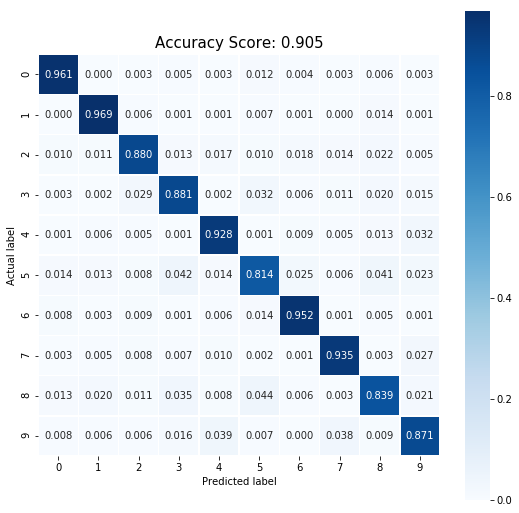

In [62]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_nor, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(score) 
plt.title(all_sample_title, size = 15);

In [63]:
index = 0
incorrectas = []
for label,predictl in zip(Y_test, predic_logit):
    if label != predictl:
        incorrectas.append(index)
    index += 1

In [64]:
len(incorrectas)

1143

<a id='step_n'> </a>
# Clasificador final

In [65]:
## Realiza transformaciones de pca y escalamiento
def trans(img, ScX, principal_fit):
    img = ScX.transform(img)
    return principal_fit.transform(img)

In [66]:
## Realiza las predicciones
def get_image(img, knn_entrenado, logit):
    img = trans(img, ScX, principal_fit)
    knn = predict_knn(img, knn_entrenado)
    logit = predict_logit(img, logit_entrenado)
    return knn, logit


In [67]:

## Función para leer una imagen en un archivo
def lee_num(path):
    im = cv2.imread(path)
    blurred = cv2.cvtColor(np.uint8(im), cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(blurred, (5, 5), 0)
    (T, thresh) = cv2.threshold(blurred, 120, 220, cv2.THRESH_BINARY)
    ret, im_th = cv2.threshold(thresh, 100, 255, cv2.THRESH_BINARY_INV)
    im_th = cv2.resize(im_th, (28, 28))
    img = np.reshape(im_th, -1)
    return np.transpose(pd.DataFrame(img))


## Función final para validar un número escrito a mano
def mi_numero(externo = False, path = None, base=None, fila=999, resultados = False):
    if externo:
        img = lee_num(path)
    else: 
        img = np.transpose(pd.DataFrame(base.iloc[fila]))
    
    (res_knn, res_logit) = get_image(img, knn_entrenado, logit)
    
    ## Escribe los resultados en pantalla
    if resultados:
        print("resultado del knn es :", res_knn)
        print("resultado del logit es : ", res_logit)
        #print("el número real es: ", real)
        imprime_num(img)
    
    return res_knn, res_logit
    

resultado del knn es : [6]
resultado del logit es :  [6]


(array([6], dtype=int64), array([6], dtype=int64))

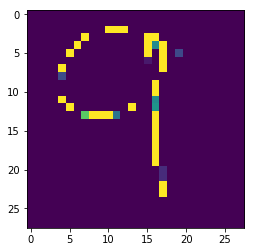

In [68]:
numero = 'Nueve_2.png'
path = 'C:/Users/c803981/Documents/Cursos/Ejercicios/Clasificador_MNIST/pruebas/' + numero

mi_numero(externo=True, path = path, base=None, fila=999, resultados=True)

In [69]:
mi_numero(externo=False, path = None, base=x_test_x, fila=2545, resultados = True)

NameError: name 'x_test_x' is not defined

<a id='step_n2'> </a>
# Validación conjunto de test original

Se valida .... blabla

In [ ]:
pred_knn = []
pred_logit = []
for i in range(len(x_test_x)):
    a,b = mi_numero(externo=False, path = None, base=x_test_x, fila= i, resultados = False)
    pred_knn.append(a)
    pred_logit.append(b)

In [ ]:
df1 = pd.DataFrame()
df1["pred_knn"] = [int(x) for x in pred_knn]
df1["pred_logit"] = [int(x) for x in pred_logit]
df1["real"] = y_test_y

In [ ]:
df1["validacion_knn"] = df1["pred_knn"] == df1["real"]

In [ ]:
df1["validacion_logit"] = df1["pred_logit"] == df1["real"]

In [ ]:
correctos_knn = (sum(df1["validacion_knn"]))/len(df1)
correctos_knn

In [ ]:
correctos_logit = (sum(df1["validacion_logit"]))/len(df1)
correctos_logit